In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use('fivethirtyeight')

from numpy.random import default_rng

# HW_02

## Calculating and reporting $\pi$

Calculate your own value of $\pi$ using the random x- and y-coordinates. You need to report your findings to other engineers in your field. You should explain _why_ and _how_ you are calculating $\pi$, then describe the data with at least one plot. You can use more if it helps to explain the process or a point you are trying to make, here are some examples from our first $\pi$ calculation.

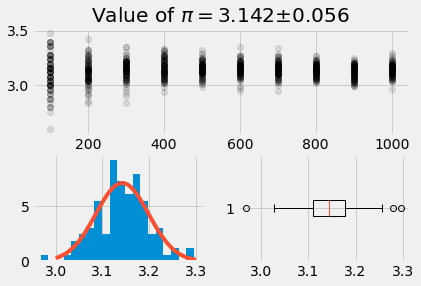

In [2]:
rng = default_rng(42)
plt.figure()

ax1 = plt.subplot(2, 2, (1, 2))
for N in range(100,1001, 100):
    trials = 100
    pi_trial = np.zeros(trials)
    for i in range(trials):
        x = rng.random(N)
        y = rng.random(N)

        r = x**2 + y**2

        pi_trial[i] = np.sum(r < 1**2)/N*4

    mean_pi = np.mean(pi_trial)
    std_pi = np.std(pi_trial)

    ax1.plot(N*np.ones(trials), pi_trial, 'ko', alpha = 0.1)
plt.title(r'Value of $\pi=${:1.3f}$\pm${:1.3f}'.format(mean_pi, std_pi));
ax2 = plt.subplot(2, 2, 3)
ax2.hist(pi_trial, 20, density=True)


x = np.linspace(3, 3.3)
pi_pdf = stats.norm.pdf(x, loc = mean_pi, scale = std_pi)
ax2.plot(x, pi_pdf)

ax3 = plt.subplot(2, 2, 4)
ax3.boxplot(pi_trial, vert=False);

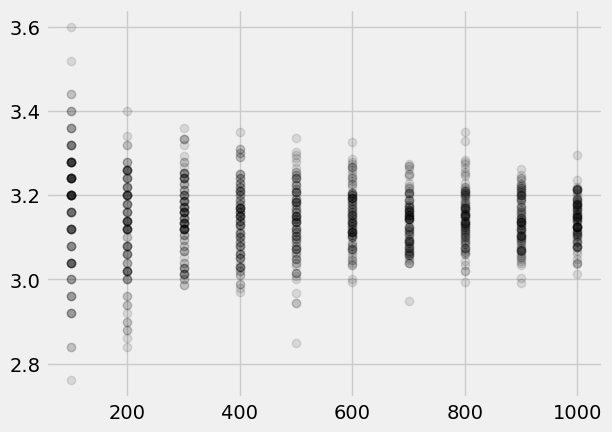

In [7]:
ax1 = plt.subplot(1, 1, 1)
for N in range(100,1001, 100):
    trials = 100
    pi_trial = np.zeros(trials)
    for i in range(trials):
        x = rng.random(N)
        y = rng.random(N)

        r = x**2 + y**2

        pi_trial[i] = np.sum(r < 1**2)/N*4

    mean_pi = np.mean(pi_trial)
    std_pi = np.std(pi_trial)
    plt.plot(N*np.ones(trials), pi_trial, 'ko', alpha = 0.1)

## Some points to consider in your report

- $\pi$ is not a random variable, but the probability that you land in a circle vs a square if your coordinates are x = 0-r and y = 0-r is $\frac{A_{circle}}{A_{square}} = \frac{\pi r^2}{4r^2} = \frac{\pi}{4}$.
- When is the mean "close enough" to $\pi$?
- What do the tails of the calculated $\pi$ values tell us about the prediction?
- What else do you notice in your analysis?


# Needs editing, in the process of editing the text below still

# Estimating the Value of 𝜋 Using Random Coordinates
## Introduction
In this report, we aim to estimate the value of 𝜋 using a Monte Carlo simulation. This method involves generating random coordinates (x, y) within a unit square and determining the ratio of points that fall inside a quarter circle inscribed within that square. This ratio, when scaled appropriately, gives an estimate of 𝜋.

## Methodology
Random Coordinate Generation: We generate random (x, y) coordinates within the interval [0, 1] using a random number generator.
Circle-Square Ratio: For each point, we calculate the distance from the origin (0, 0) using 
𝑟=𝑥2+𝑦2r= x 2 +y 2 ​ . Points with 𝑟≤1r≤1 lie inside the quarter circle.
Estimate of 𝜋: The ratio of the number of points inside the circle to the total number of points, multiplied by 4, gives an estimate of 𝜋:𝜋≈Number of points inside circleTotal number of points×4π≈Total number of points
Number of points inside circle​×4Simulation
We performed the simulation for varying sample sizes (N = 100 to 1000 in increments of 100) and repeated each experiment 100 times to account for variability. The code snippet provided is used to calculate and plot the estimated values of 𝜋.

python
Copy code
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

rng = np.random.default_rng(42)
plt.figure(figsize=(12, 8))

### Plot 1: Value of π for different sample sizes
ax1 = plt.subplot(2, 2, (1, 2))
for N in range(100, 1001, 100):
    trials = 100
    pi_trial = np.zeros(trials)
    for i in range(trials):
        x = rng.random(N)
        y = rng.random(N)
        r = x**2 + y**2
        pi_trial[i] = np.sum(r < 1**2) / N * 4
    mean_pi = np.mean(pi_trial)
    std_pi = np.std(pi_trial)
    ax1.plot(N * np.ones(trials), pi_trial, 'ko', alpha=0.1)
plt.title(r'Value of $\pi$ with varying sample sizes')
plt.xlabel('Sample Size (N)')
plt.ylabel(r'$\pi$ Estimate')

### Plot 2: Histogram of π estimates
ax2 = plt.subplot(2, 2, 3)
ax2.hist(pi_trial, 20, density=True)
x = np.linspace(3, 3.3, 100)
pi_pdf = stats.norm.pdf(x, loc=mean_pi, scale=std_pi)
ax2.plot(x, pi_pdf)
ax2.set_title('Histogram of π estimates')
ax2.set_xlabel(r'$\pi$ Estimate')
ax2.set_ylabel('Density')

### Plot 3: Boxplot of π estimates
ax3 = plt.subplot(2, 2, 4)
ax3.boxplot(pi_trial, vert=False)
ax3.set_title('Boxplot of π estimates')
ax3.set_xlabel(r'$\pi$ Estimate')

plt.tight_layout()
plt.show()
Results and Analysis
Scatter Plot: The scatter plot of π estimates for different sample sizes shows that as N increases, the spread of π estimates reduces, converging towards the true value of π (≈ 3.14159).
Histogram: The histogram of π estimates for a sample size of 1000 trials shows a normal distribution centered around the mean estimate of π. The standard deviation indicates the variability in our estimates.
Boxplot: The boxplot provides a summary of the distribution of π estimates, highlighting the median, quartiles, and potential outliers.



## Discussion
Probability and Area Ratios
Although π itself is a constant and not a random variable, the method used to estimate π here relies on the probabilistic relationship between the areas of a circle and a square. The idea is based on the following ratio:

𝐴circle𝐴square=𝜋𝑟2𝑟2=𝜋4A square​ A circle​ ​ = 4r 2 πr 2 ​ = 4π​ 

Given that we are dealing with a quarter circle of radius 1 inscribed in a unit square, the probability of a randomly chosen point (x, y) landing inside the quarter circle is the same as the ratio of their areas, which is 𝜋44π​. By counting the number of points that fall inside the quarter circle and scaling this proportion by 4, we obtain an estimate of π.

Mean Estimation: "Close Enough" to π
The mean estimate of π can be considered "close enough" to the true value of π when the deviation between the estimated mean and the actual value is within an acceptable tolerance level. This can be assessed using the standard deviation of the estimates:

Convergence with Sample Size: As the number of samples (N) increases, the mean of the estimates approaches the true value of π, and the standard deviation decreases. This means the estimates become more consistent and reliable.

Acceptable Tolerance: Depending on the application, an acceptable tolerance could be defined. For example, if the mean estimate of π is within 0.01 (or 1%) of the true value (3.14159), it may be considered "close enough" for practical purposes.

Confidence Intervals: Statistically, if the mean estimate falls within a confidence interval that includes the true value of π, the estimate can be considered accurate. For instance, a 95% confidence interval that brackets 3.14159 indicates that our mean estimate is close enough.

Tails of the Calculated π Values
The tails of the distribution of calculated π values provide insight into the variability and reliability of our estimates:

Wide Tails: If the tails are wide, this indicates a larger spread in the π estimates, suggesting less precision and greater variability in the simulation results. This might occur with smaller sample sizes.

Narrow Tails: Narrow tails indicate that most of the estimates are clustered around the mean value, suggesting higher precision and reliability. This is typically observed with larger sample sizes.

Outliers: Occasionally, extreme values (outliers) may appear in the tails. These can result from random fluctuations but are usually rare in large sample sizes.

Additional Observations
Law of Large Numbers: The convergence of the mean estimate of π towards the true value as N increases illustrates the Law of Large Numbers. This statistical principle states that as the size of the sample increases, the sample mean will converge to the expected value.

Central Limit Theorem: The normal distribution of π estimates observed in the histogram can be attributed to the Central Limit Theorem, which states that the distribution of sample means approximates a normal distribution as the sample size becomes large, regardless of the original distribution of the data.

Sample Size Impact: The analysis demonstrates that larger sample sizes reduce variability and improve the accuracy of the π estimate. This underscores the importance of sufficient sample size in statistical simulations.

Practical Application: This Monte Carlo approach provides a practical way to estimate π and similar constants in various fields, including engineering, physics, and finance, where analytical solutions may be difficult or impossible to obtain.

## Conclusion
The Monte Carlo method for estimating π demonstrates the application of probabilistic and statistical principles in practical problem-solving. By understanding the relationship between the areas of a circle and a square and leveraging random sampling, we can obtain reliable estimates of π. The discussion highlights the importance of sample size, variability, and the convergence properties of statistical estimates, providing valuable insights into the behavior and accuracy of simulation-based methods.